https://towardsdatascience.com/early-detecting-credit-card-frauds-38db7c190e44

In [1]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 15.9 MB/s 
     |████████████████████████████████| 199 kB 37.1 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
default = plt.rcParams.copy()
from matplotlib import cycler
colors = cycler('color', ['#FFC30B', '#BFBFBF', '#595959'])
plt.rc('axes', facecolor='#FFFFFF', edgecolor='none',axisbelow=True, grid=False, prop_cycle=colors)
plt.rc('xtick', direction='out', color='#BFBFBF')
plt.rc('ytick', direction='out', color='#BFBFBF')
plt.rc('patch', edgecolor='#BFBFBF')
plt.rc('lines', linewidth=1)
plt.rc('figure',dpi=100)
plt.rc('savefig',dpi=200)

In [4]:
FILE_PATH = "/content/drive/MyDrive/CTIC_UNI/DATA_SCIENCE/COURSE_01_MAY_2022/SESION05/data/creditcard.csv"

df = pd.read_csv(FILE_PATH)

In [5]:
print(f"Total rows: {df.shape[0]}\nTotal columns: {df.shape[1]}")

Total rows: 284807
Total columns: 31


**Tiempo** - segundos transccrurridos desde la primera transaccion registrada en el dataset

**Monto** - el monto total de la transaccion

**Clase** - Si la transaccion fue fraudulente (1) o no (0)

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

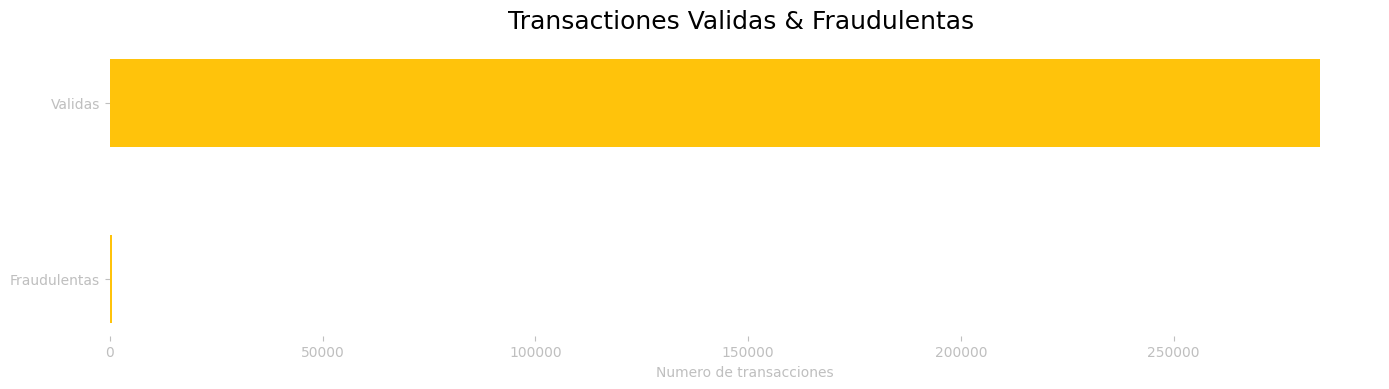

In [14]:
fig, ax = plt.subplots(figsize=(14,4))

labels = ["Fraudulentas", "Validas"]
values = [df.Class.value_counts()[1],df.Class.value_counts()[0]]

ax.set_title("Transactiones Validas & Fraudulentas ",fontsize=18,y=1.03)
plt.barh(labels,values,height=0.5)
ax.set_xlabel("Numero de transacciones", c="#BFBFBF")

plt.tight_layout()

In [15]:
print(f"Total Real Transactions: {values[1]}\nTotal Frauds: {values[0]}")
print(f"% Frauds: {values[0]/df.shape[0]*100:.3f}%")

Total Real Transactions: 284315
Total Frauds: 492
% Frauds: 0.173%


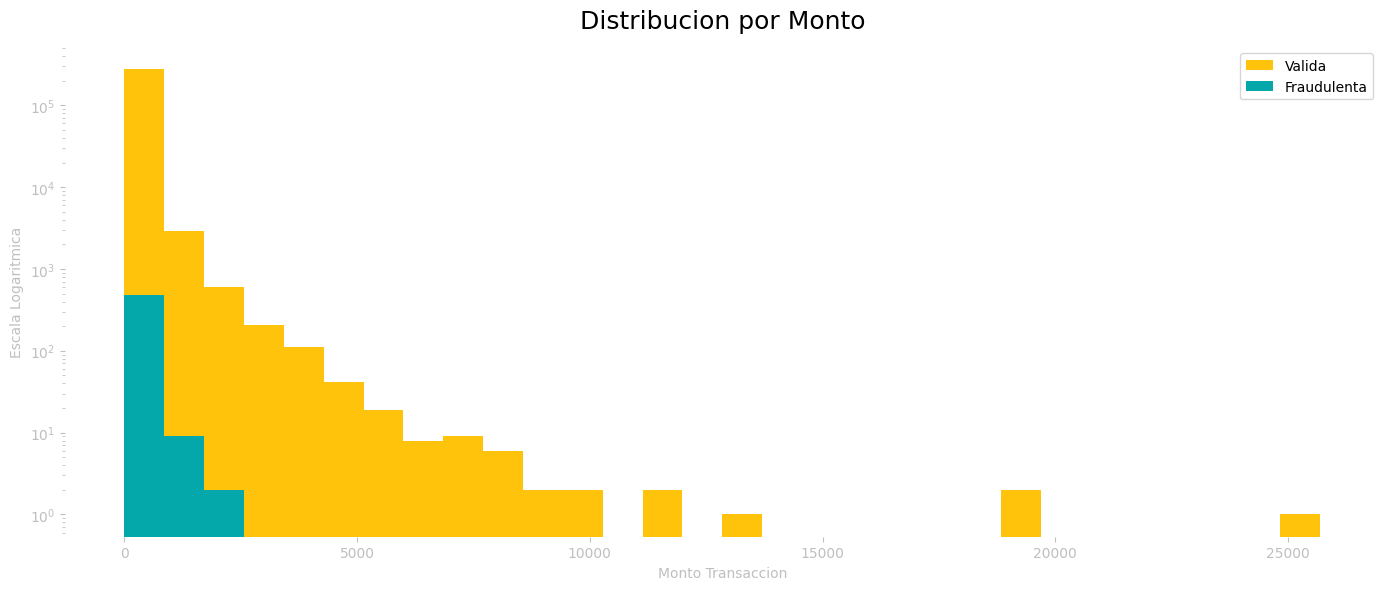

In [22]:
fig, ax = plt.subplots(figsize=(14,6))

palette = ["#05A8AA","#FFC30B"]
sns.histplot(data = df, x="Amount",bins=30,hue=df.Class,palette=palette,ax=ax,alpha=1.0,hue_order=[1,0],linewidth=0)
ax.set_title("Distribucion por Monto",fontsize=18,y=1.02)
ax.set_ylabel("Escala Logaritmica",c="#BFBFBF")
ax.set_xlabel("Monto Transaccion",c="#BFBFBF")
legend=["Valida","Fraudulenta"]
ax.legend(legend)
plt.yscale("log")

plt.tight_layout()
plt.savefig(fname="amount_hist.svg")

In [20]:
print(f"Tiempo Total Transcurrido: {df.Time.max():.0f} segundos o {df.Time.max()/3600:.2f} horas")

Tiempo Total Transcurrido: 172792 segundos o 48.00 horas


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


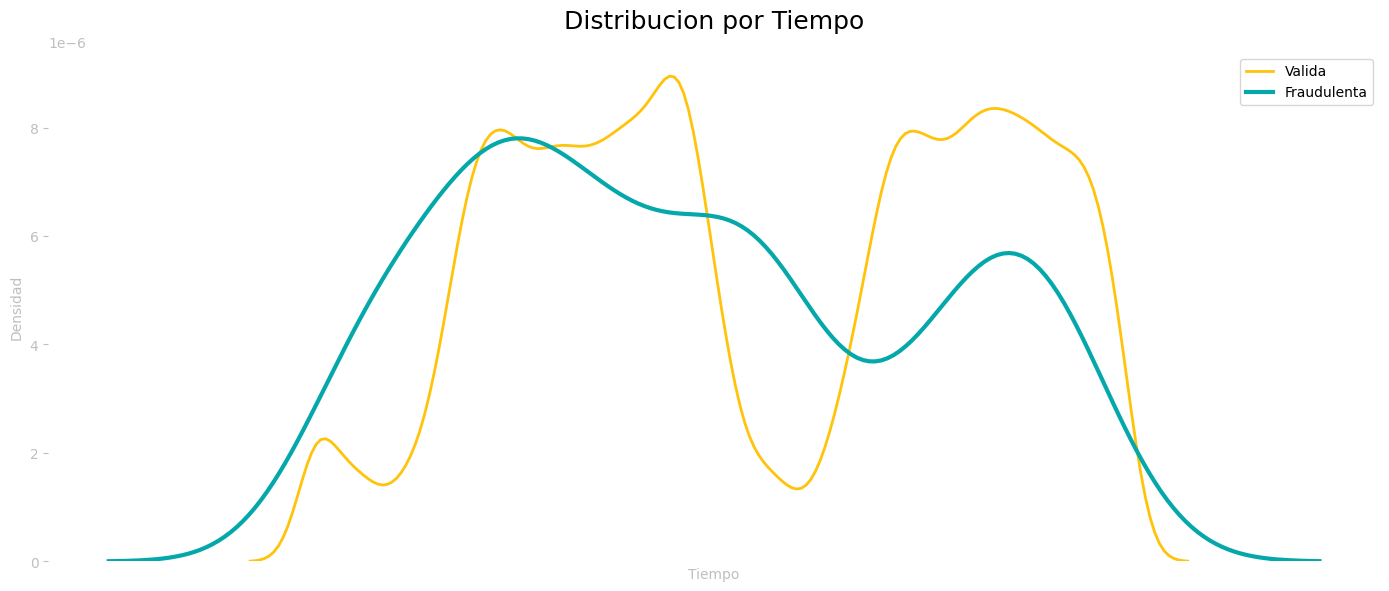

In [23]:
fig, ax = plt.subplots(figsize=(14,6))

ax.set_title("Distribucion por Tiempo", fontsize=18, y=1.03)
sns.distplot(df.Time.loc[df.Class == 0],bins=20,color="#FFC30B",hist=False,ax=ax,kde_kws={"linewidth": 2})
sns.distplot(df.Time.loc[df.Class == 1],bins=20,color="#05A8AA",hist=False,ax=ax,kde_kws={"linewidth": 3})
ax.set_ylabel("")
legend = ["Valida","Fraudulenta"]
ax.legend(legend)
ax.set_xticks([])
ax.set_xlabel("Tiempo", c="#BFBFBF")
ax.set_ylabel("Densidad",c="#BFBFBF")

plt.tight_layout()
plt.savefig(fname="time_hist.svg")

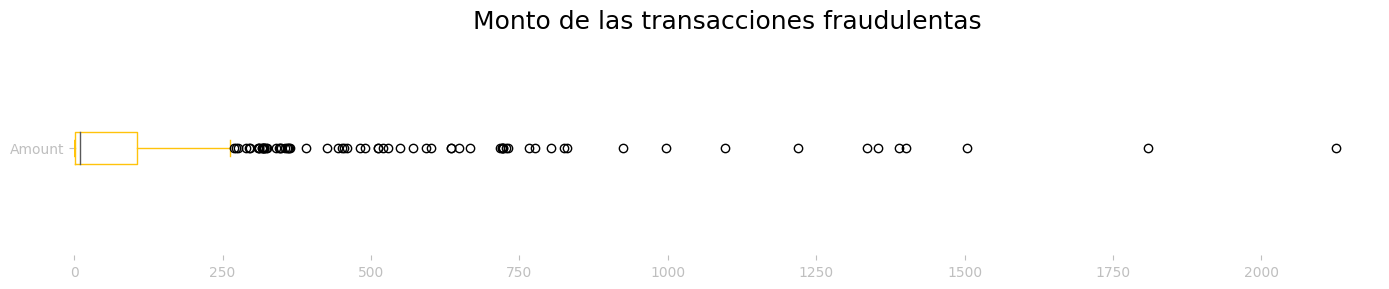

In [25]:
fig, ax = plt.subplots(figsize=(14,3))

target = df.loc[df.Class == 1].Amount
target.plot(kind="box",vert=False)
ax.set_xlim(0,2200)
ax.set_title("Monto de las transacciones fraudulentas", fontsize=18, y=1.02)

plt.tight_layout()

In [26]:
target.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

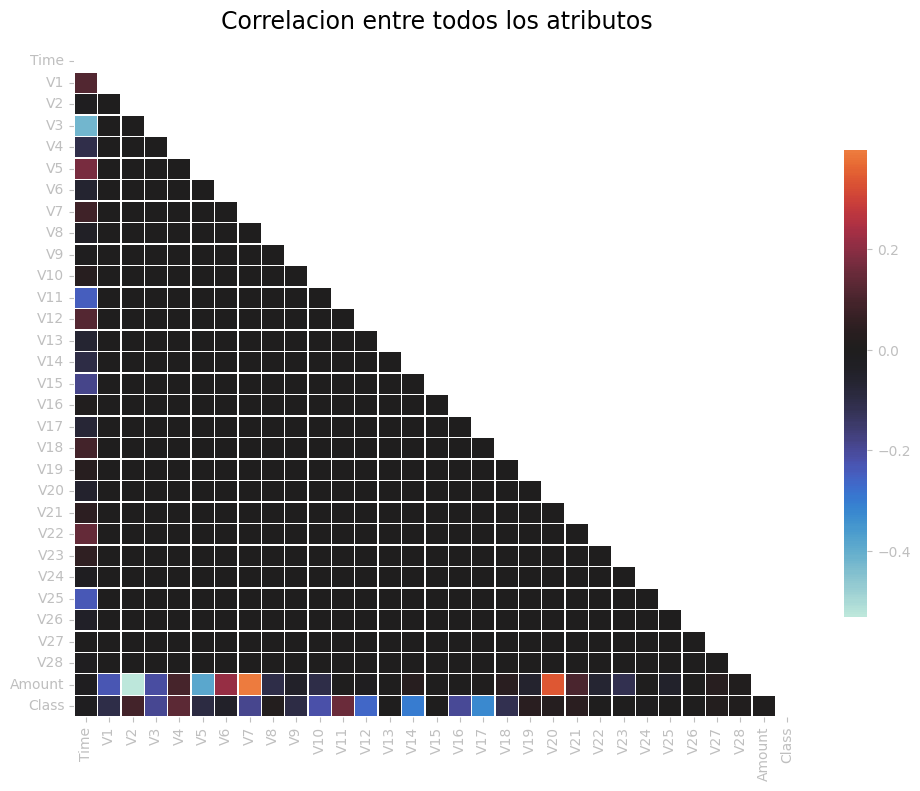

In [28]:
fig,ax = plt.subplots(figsize=(10,8))

heat_df = df.corr()
plt.title("Correlacion entre todos los atributos", fontsize=17,y=1.02)
sns.color_palette("magma", as_cmap=True)
mask = np.triu(np.ones_like(heat_df, dtype=bool))
sns.heatmap(data=heat_df,annot=False,mask=mask,center=0,linewidths=0.3,annot_kws={"fontsize":12},cbar_kws={"shrink": .7});

plt.tight_layout()

In [29]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [30]:
df.Time = (df.Time - df.Time.mean()) / df.Time.std()
df.Amount = (df.Amount - df.Amount.mean()) / df.Amount.std()

In [31]:
X = df.drop(axis=1,columns=["Class"])
y = df.Class

In [32]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-6.386744e-18,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,3.193372e-17
std,1.000000e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000000e+00
min,-1.996580e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532288e-01
25%,-8.552105e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308395e-01
50%,-2.131450e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652710e-01
75%,9.372158e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471699e-02
max,1.642055e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023621e+02


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X);

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Primer Random Forest**

In [35]:
from sklearn.ensemble import RandomForestClassifier

# 1. Instanciamos el modelo
model = RandomForestClassifier(n_estimators=100,random_state=0)

# 2. Entrenamos el modelo 
model.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [36]:
# 3. Predecimos para el test set
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f"Overall Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

Overall Accuracy: 99.95%


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.78      0.84       101

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



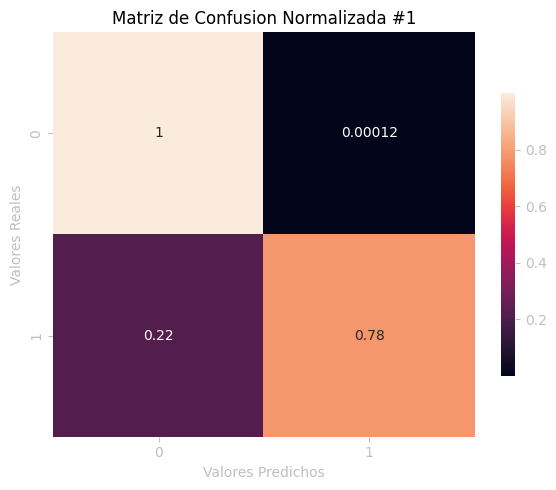

In [39]:
fig, ax = plt.subplots(figsize=(6,5))

norm_conf = [i for i in confusion_matrix(y_test,y_pred)]
norm_conf[0] = norm_conf[0] / norm_conf[0].sum()
norm_conf[1] = norm_conf[1] / norm_conf[1].sum()
sns.color_palette("magma", as_cmap=True)
sns.heatmap(data=norm_conf, annot=True,ax=ax,cbar_kws={"shrink": .7})
ax.set_title("Matriz de Confusion Normalizada #1",y=1.02)
ax.set_ylabel("Valores Reales", c="#BFBFBF")
ax.set_xlabel("Valores Predichos", c="#BFBFBF")

plt.tight_layout()
print(classification_report(y_test,y_pred))

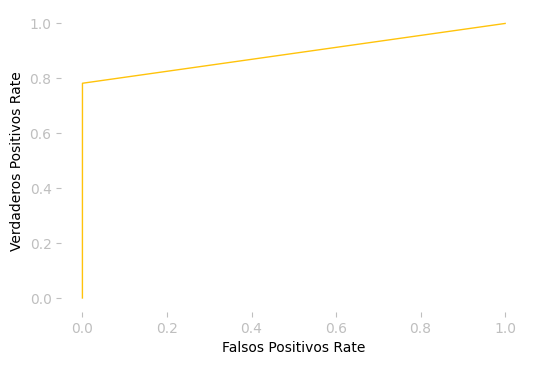

In [40]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
plt.ylabel('Verdaderos Positivos Rate')
plt.xlabel('Falsos Positivos Rate')
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score, PrecisionRecallDisplay, auc, average_precision_score

print(f"ROC AUC Score: {roc_auc_score(y_test,y_pred):.2f}")

ROC AUC Score: 0.89


Precision Promedio (PP): 0.72



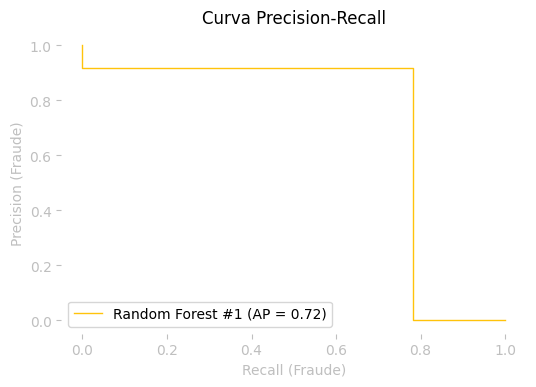

In [45]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="Random Forest #1")
_ = display.ax_.set_title("Curva Precision-Recall")
_ = display.ax_.set_xlabel("Recall (Fraude)",c="#BFBFBF")
_ = display.ax_.set_ylabel("Precision (Fraude)",c="#BFBFBF")

print(f"Precision Promedio (PP): {average_precision_score(y_test,y_pred):.2f}\n")

**Manejando el Desbalance**

In [46]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

over = SMOTE(sampling_strategy=0.1,random_state=0)
under = RandomUnderSampler(sampling_strategy=0.5,random_state=0)
steps = [('o',over),('u',under)]

pipeline = Pipeline(steps=steps)

In [47]:
# Antes de la transformacion
example = [i for i in y.value_counts()]
print(f"Total Transacciones Validas: {example[0]}\nTotal Fraudes: {example[1]}")
print(f"% Fraudes: {example[1]/(example[1]+example[0])*100:.2f}%")

Total Transacciones Validas: 284315
Total Fraudes: 492
% Fraudes: 0.17%


In [48]:
# Aplicando la transformacion 

X_train, y_train = pipeline.fit_resample(X_train,y_train)

In [50]:
# Luego de la transformacion
example = [i for i in y_train.value_counts()]
print(f"Total Transacciones Validas (training): {example[0]}\nTotal Fraudes (training): {example[1]}")
print(f"% Fraudes: {example[1]/(example[1]+example[0])*100:.2f}%")

Total Transactiones Validas (training): 45490
Total Fraudes (training): 22745
% Fraudes: 33.33%


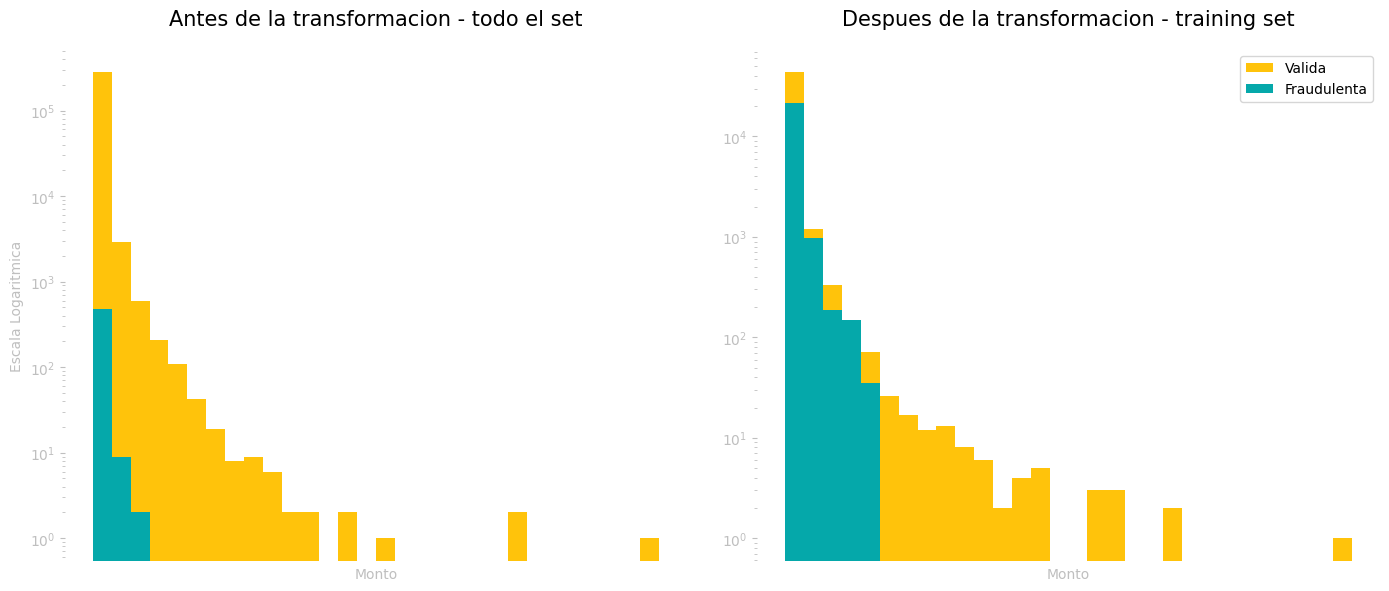

In [54]:
# Plot Tratado

fig,(ax1,ax2) = plt.subplots(figsize=(14,6),nrows=1,ncols=2)

example_df = X_train.copy().merge(y_train.rename('Class'), left_index=True, right_index=True)
ax1.set_title("Antes de la transformacion - todo el set", fontsize=15,y=1.03)
ax2.set_title("Despues de la transformacion - training set", fontsize=15,y=1.03)
sns.histplot(data = df, x="Amount", bins=30,hue=df.Class,palette=palette,ax=ax1,alpha=1.0,hue_order=[1,0],linewidth=0,legend=False)
sns.histplot(data = example_df, x="Amount",bins=30,hue="Class",palette=palette,ax=ax2,alpha=1.0,hue_order=[1,0],linewidth=0)
ax2.legend(legend)
ax1.set_ylabel("Escala Logaritmica", c = "#BFBFBF")
ax2.set_ylabel(" ")
ax1.set_xlabel("Monto", c = "#BFBFBF")
ax2.set_xlabel("Monto", c = "#BFBFBF")
ax1.set_yscale("log")
ax2.set_yscale("log")
ax1.set_xticks([])
ax2.set_xticks([])

plt.tight_layout()
plt.savefig(fname="imbalance_comparison.svg")

**Segundo Random Forest**

In [55]:
# 1. Instanciamos el modelo
model = RandomForestClassifier(n_estimators=100,random_state=0)

# 2. Entrenando el modelo
model.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [56]:
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Exportamos como un archivo dot
export_graphviz(estimator, out_file='tree.dot',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convertir a png usando comando del sistema
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Displayamos jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Output hidden; open in https://colab.research.google.com to view.

In [58]:
# 3. Predicciones para el test set
from datetime import datetime
start=datetime.now()

y_pred = model.predict(X_test)

print(f"Total tiempo de ejecucion: {(datetime.now()-start).seconds}.{(datetime.now()-start).microseconds/10000:.0f} seconds\n")

Total Tiempo de ejecucion: 1.24 seconds



In [59]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56962 entries, 183484 to 246221
Columns: 30 entries, Time to Amount
dtypes: float64(30)
memory usage: 13.5 MB


In [60]:
test_list = np.array([i for i in range(30)]).reshape(1,-1)
start=datetime.now()

test_pred = model.predict(test_list)

print(f"Total tiempo de ejecucion: {(datetime.now()-start).seconds}.{(datetime.now()-start).microseconds/100:.0f} seconds\n")

Total Run Time: 0.240 seconds



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f"Overall Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

Overall Accuracy: 99.92%


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.72      0.86      0.79       101

    accuracy                           1.00     56962
   macro avg       0.86      0.93      0.89     56962
weighted avg       1.00      1.00      1.00     56962



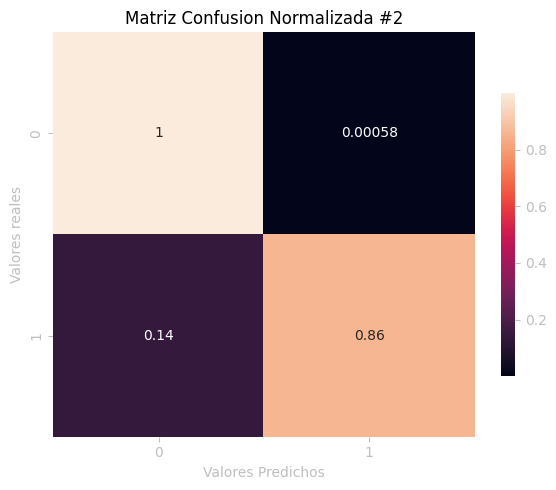

In [63]:
fig, ax = plt.subplots(figsize=(6,5))

norm_conf = [i for i in confusion_matrix(y_test,y_pred)]
norm_conf[0] = norm_conf[0] / norm_conf[0].sum()
norm_conf[1] = norm_conf[1] / norm_conf[1].sum()
sns.color_palette("magma", as_cmap=True)
sns.heatmap(data=norm_conf, annot=True,ax=ax,cbar_kws={"shrink": .7})
ax.set_title("Matriz Confusion Normalizada #2",y=1.02)
ax.set_ylabel("Valores reales", c="#BFBFBF")
ax.set_xlabel("Valores Predichos", c="#BFBFBF")

plt.tight_layout()
print(classification_report(y_test,y_pred))

In [64]:
from sklearn.metrics import roc_auc_score, PrecisionRecallDisplay, auc, average_precision_score

print(f"ROC AUC Score: {roc_auc_score(y_test,y_pred):.2f}")

ROC AUC Score: 0.93


Precision Promedio (PP): 0.62



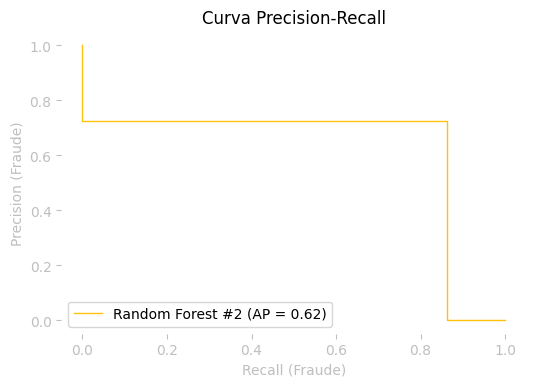

In [67]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="Random Forest #2")
_ = display.ax_.set_title("Curva Precision-Recall")
_ = display.ax_.set_xlabel("Recall (Fraude)",c="#BFBFBF")
_ = display.ax_.set_ylabel("Precision (Fraude)",c="#BFBFBF")

print(f"Precision Promedio (PP): {average_precision_score(y_test,y_pred):.2f}\n")